Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  float64
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  float64
 5   dst_bytes                    148517 non-null  float64
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  float64
 8   urgent                       148517 non-null  float64
 9   hot                          148517 non-null  float64
 10  num_failed_logins            148517 non-null  float64
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              

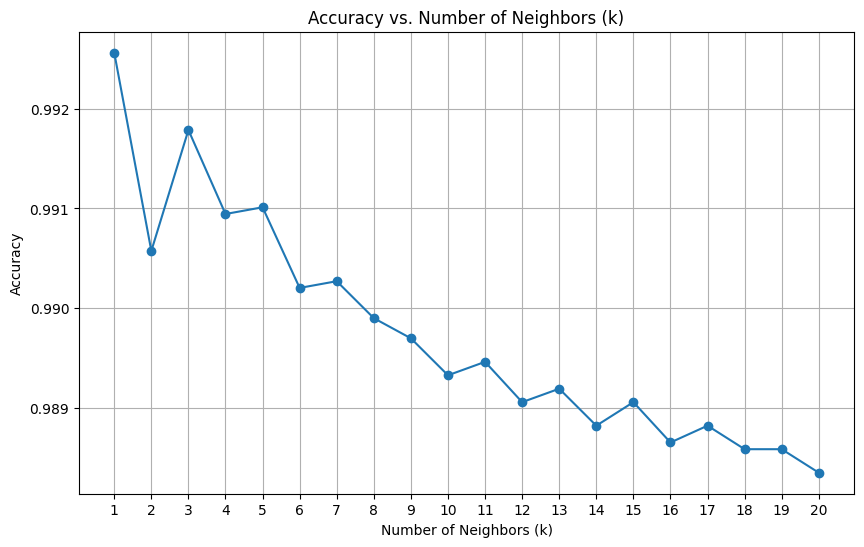

Optimal Number of Neighbors: 1
Evaluation Results:
Accuracy: 0.9926
Precision: 0.9931
Recall: 0.9926
F1-Score: 0.9928

Confusion Matrix:
[[14186   107]
 [  114 15297]]


In [1]:
# ------------------------- Load Dataset --------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/NSL_KDD.csv")
print("Dataset Loaded Successfully!")
print(data.info())

# ---------------------- Data Preprocessing ----------------------------
# Separate features and target
X = data.drop(columns=["class"])
y = data["class"]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Encode categorical features using Label Encoding
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Replace infinity values and drop NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------- Train-Test Split -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"Training Set Size: {X_train.shape[0]}, Test Set Size: {X_test.shape[0]}")

# ------------------- KNN Model and Optimization -----------------------
# Find optimal k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot Accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print(f"Optimal Number of Neighbors: {best_k}")

# ------------------------ Final Model Evaluation ----------------------
# Train with optimal k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Metrics
print("Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)